# Longest Consecutive Dry Days

Calculates annually the longest consecutive dry days annually. Dry days are edays with less than 1.0mm of rainfall.

## Requirements: 
Run downloadGHCNd.ipynb located /1_atmosphere/downloadGHCnd.ipynb to download the required GHCNd data


In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
# from datetime import date

In [2]:
import pickle 

In [4]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

In [5]:
precip = pd.read_pickle("../../GHCNd/pkl/PRECIP_KOROR_PSW00040309.pkl")
precip_table = {}
#This file also had the same issue with the csv not including proper decimal values
precip["PRCP"] = precip["PRCP"]/10
precip["DRY_DAY"]= precip["PRCP"] < 1.0
precip['DATE'] = pd.to_datetime(precip['DATE'], format='%Y-%m-%d')
precip["YEAR"] = precip['DATE'].dt.year

In [6]:
precip

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,PRCP,SNOW,SNWD,WET_DAY,DRY_DAY,YEAR
0,PSW00040309,1951-07-01,7.33674,134.47686,27.4,"KOROR, PW PS",0.0,0.0,0.0,False,True,1951
1,PSW00040309,1951-07-02,7.33674,134.47686,27.4,"KOROR, PW PS",0.8,0.0,0.0,False,True,1951
2,PSW00040309,1951-07-03,7.33674,134.47686,27.4,"KOROR, PW PS",3.8,0.0,0.0,True,False,1951
3,PSW00040309,1951-07-04,7.33674,134.47686,27.4,"KOROR, PW PS",18.3,0.0,0.0,True,False,1951
4,PSW00040309,1951-07-05,7.33674,134.47686,27.4,"KOROR, PW PS",0.0,0.0,0.0,False,True,1951
...,...,...,...,...,...,...,...,...,...,...,...,...
25987,PSW00040309,2024-01-03,7.33674,134.47686,27.4,"KOROR, PW PS",1.0,NaN,NaN,True,False,2024
25988,PSW00040309,2024-01-04,7.33674,134.47686,27.4,"KOROR, PW PS",16.0,NaN,NaN,True,False,2024
25989,PSW00040309,2024-01-05,7.33674,134.47686,27.4,"KOROR, PW PS",0.0,NaN,NaN,False,True,2024
25990,PSW00040309,2024-01-06,7.33674,134.47686,27.4,"KOROR, PW PS",0.0,NaN,NaN,False,True,2024


In [7]:
def consecutive_dry_days(series):
    consec_dry = 0
    max_consec_dry = 0
    for value in series:
        if value:  # If it's a dry day (True)
            consec_dry += 1
        else:  # If it's not a dry day (False)
            max_consec_dry = max(max_consec_dry, consec_dry)
            consec_dry = 0
    return max_consec_dry

In [8]:
consecutive_dry_year = precip.groupby('YEAR')['DRY_DAY'].apply(consecutive_dry_days)

In [9]:
consecutive_dry_year[1:-1]

YEAR
1952     8
1953     6
1954    13
1955     8
1956     7
        ..
2019     8
2020    14
2021     7
2022     6
2023     5
Name: DRY_DAY, Length: 72, dtype: int64

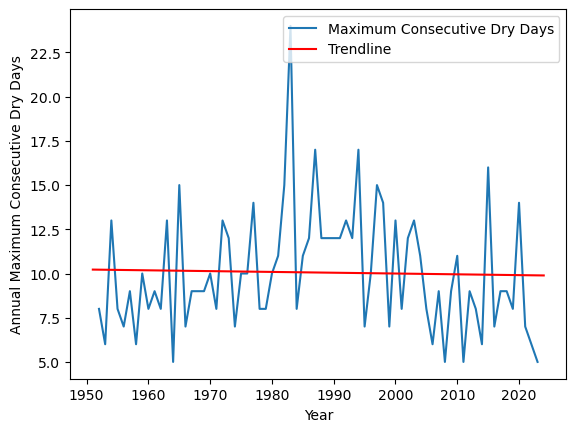

In [10]:
plt.plot(consecutive_dry_year[1:-1].index,consecutive_dry_year[1:-1].values, label = "Maximum Consecutive Dry Days")
plt.xlabel('Year')
plt.ylabel('Annual Maximum Consecutive Dry Days')
# plt.title("Annual Total Rainfall on Wet Days")

z = np.polyfit(consecutive_dry_year[1:-1].index, consecutive_dry_year[1:-1].values, 1)  # Fit a linear trendline
p = np.poly1d(z)  # Create a polynomial function for the trendline
#Save decadal trend
precip_table["Annual consecutive dry days"] = z[0]*10
plt.plot(consecutive_dry_year.index, p(consecutive_dry_year.index), label='Trendline', color="red")
plt.legend()
plt.savefig('historical-maximum-consecutive-dry-days.png', format='png',dpi=300,facecolor='white')

plt.show()